# Data Frame Form Directory of MultipleFiles

### Set up the Environment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import clear_output
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
clear_output()

In [3]:
!pip install pyspark
clear_output()

### Import Spark and other classes

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,IntegerType

### Download the Dataset -- > A Zip file

In [6]:
!gdown 1GriHiFQj0lwyRPXZKZyNKLnDrQBCoL27

Downloading...
From: https://drive.google.com/uc?id=1GriHiFQj0lwyRPXZKZyNKLnDrQBCoL27
To: /content/salesdata.zip
100% 2.33M/2.33M [00:00<00:00, 158MB/s]


In [7]:
import os
[x for x in os.listdir() if x.endswith('.zip')]

['salesdata.zip']

In [9]:
from helper_functions import unzip_untar_data

In [10]:
unzip_untar_data('salesdata.zip')

File extension: .zip
File extracting.......

Extraction Completed successfully
Deleted source file


### Crate the Spark Application Instance

In [5]:
spark = SparkSession.builder.appName('readMutipleFilesFromDirectory').getOrCreate()

### Create Schema for the dataFrame

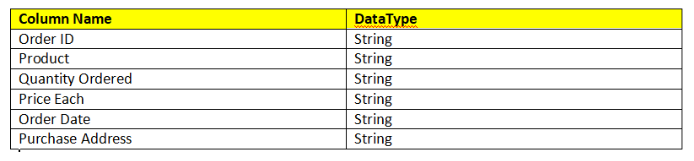

In [13]:
schema = StructType([
    StructField('Order Id', StringType(), True),
    StructField('Product', StringType(), True),
    StructField('Quantity Ordered', IntegerType(), True),
    StructField('Price Each', IntegerType(), True),
    StructField('Order Date', StringType(), True),
    StructField('Purchase Address', StringType(), True)
])

### Define an Directory where the multiple files are contained

In [16]:
files_directory = '/content/salesdata' # pointing to the folder of mutiple csv file of same format

### Read all the files from the directory

In [17]:
read_format = spark.read.format('csv')
read_format = read_format.option('header',True)
read_format = read_format.schema(schema)

sales_dataframe = read_format.load(files_directory)

The Difference is if there are multiple files need to be read, then just point to the directory otherwise just point to the file

In [18]:
sales_dataframe.columns

['Order Id',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [20]:
sales_dataframe.printSchema()

root
 |-- Order Id: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: integer (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [22]:
sales_dataframe.show(10, truncate = False)

+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|Order Id|Product                   |Quantity Ordered|Price Each|Order Date    |Purchase Address                         |
+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|295665  |Macbook Pro Laptop        |1               |1700      |12/30/19 00:01|136 Church St, New York City, NY 10001   |
|295666  |LG Washing Machine        |1               |null      |12/29/19 07:03|562 2nd St, New York City, NY 10001      |
|295667  |USB-C Charging Cable      |1               |null      |12/12/19 18:21|277 Main St, New York City, NY 10001     |
|295668  |27in FHD Monitor          |1               |null      |12/22/19 15:13|410 6th St, San Francisco, CA 94016      |
|295669  |USB-C Charging Cable      |1               |null      |12/18/19 12:38|43 Hill St, Atlanta, GA 30301            |
|295670  |AA Bat

In [24]:
sales_dataframe.count()

186850

In [25]:
!mkdir output_directory

In [26]:
destination = '/content/output_directory'

In [27]:
sales_dataframe.write.format('csv').mode('overwrite').save(destination)

The end of the notebook